## **BREAST CANCER PREDICTION**
**Done By:
Shashank P
Santosh 
Nithin Kumar B
Adithya Sunder**

**LOADING LIBRARIES**

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import itertools
from itertools import chain

from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

py.init_notebook_mode(connected=True)

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



**READING THE DATA**

In [2]:
# Read data
data = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')

# **REASSING TARGETS AND DROP USELESS FEATURES**

In [3]:
# Drop useless variables
data = data.drop(['Unnamed: 32','id'],axis = 1)

# Reassign target
data.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)

 **Exploratory Data Analysis**
 Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods

# **Head and describe**

In [4]:
# Head
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# describe
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**TARGET DISTRIBUTION (NUMBER AND PERCENTAGE)**

In [6]:
# 2 datasets
M = data[(data['diagnosis'] != 0)]
B = data[(data['diagnosis'] == 0)]

In [7]:
# count of the data avaialble
trace = go.Bar(x = (len(M), len(B)), y = ['malignant', 'benign'], orientation = 'h', opacity = 0.8, marker=dict(
        color=[ 'red', 'green'],
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Count of diagnosis variable')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

**FEATURES DISTRIBUTION**

The distribution of a feature over its range, with value on the horizontal axis and frequency on the vertical axis.

In [8]:
def plotDistribution(dataSelect, sizeBin) :  
    tmp1 = M[dataSelect]
    tmp2 = B[dataSelect]
    histData = [tmp1, tmp2]
    
    group_labels = ['malignant', 'benign']
    colors = ['red', 'green']

    fig = ff.create_distplot(histData, group_labels, colors = colors, show_hist = True, bin_size = sizeBin, curve_type='kde')
    
    fig['layout'].update(title = dataSelect)

    py.iplot(fig, filename = 'Density plot')

In [9]:
#plot distribution 'mean'
plotDistribution('radius_mean', .5)
# plotDistribution('texture_mean', .5)
# plotDistribution('perimeter_mean', 5)
# plotDistribution('area_mean', 10)
#plotDistribution('smoothness_mean', .5)
#plotDistribution('compactness_mean' .5)
#plotDistribution('concavity_mean' .5)
#plotDistribution('concave points_mean' .5)
#plotDistribution('symmetry_mean' .5)
#plotDistribution('fractal_dimension_mean' .5)

In [10]:
#plot distribution 'se'
plotDistribution('radius_se', .1)
# plotDistribution('texture_se', .1)
# plotDistribution('perimeter_se', .5)
# plotDistribution('area_se', 5)
#plotDistribution('smoothness_se', .5)
#plotDistribution('compactness_se', .5)
#plotDistribution('concavity_se', .5)
#plotDistribution('concave points_se', .5)
#plotDistribution('symmetry_se', .5)
#plotDistribution('fractal_dimension_se', .5)

In [11]:
#plot distribution 'worst'
plotDistribution('radius_worst', .5)
# plotDistribution('texture_worst', .5)
# plotDistribution('perimeter_worst', 5)
# plotDistribution('area_worst', 10)
#plotDistribution('smoothness_worst', .5)
#plotDistribution('compactness_worst', .5)
#plotDistribution('concavity_worst', .5)
#plotDistribution('concave points_worst', .5)
#plotDistribution('symmetry_worst', .5)
#plotDistribution('fractal_dimension_worst', .5)

CORRELATION MATRIX
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

In [12]:
#correlation
correlation = data.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

In [13]:
#Plotting
trace = go.Heatmap(z = corr_array,x = matrix_cols,y = matrix_cols,xgap = 2,ygap = 2,colorscale='jet',colorbar   = dict() ,)
layout = go.Layout(dict(title = 'Correlation Matrix for variables',autosize = False,height  = 720,width   = 800,margin  = dict(r = 0 ,l = 210,t = 25,b = 210,),yaxis   = dict(tickfont = dict(size = 9)),xaxis   = dict(tickfont = dict(size = 9)),))
fig = go.Figure(data = [trace],layout = layout)
py.iplot(fig)

Now, we check the correlation between few features by pair

**POSITIVE CORRELATED FEATURES**

In [14]:
def plotFeatureOneFeatureTwo(featureOne, featureTwo) :  
    trace0 = go.Scatter(
        x = M[featureOne],
        y = M[featureTwo],
        name = 'malignant',
        mode = 'markers', 
        marker = dict(color = 'red',
            line = dict(
                width = 1)))

    trace1 = go.Scatter(
        x = B[featureOne],
        y = B[featureTwo],
        name = 'benign',
        mode = 'markers',
        marker = dict(color = 'green',
            line = dict(
                width = 1)))

    layout = dict(title = featureOne +" "+"vs"+" "+ featureTwo,
                  yaxis = dict(title = featureTwo,zeroline = False),
                  xaxis = dict(title = featureOne, zeroline = False)
                 )

    plots = [trace0, trace1]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

In [15]:
plotFeatureOneFeatureTwo('perimeter_mean','radius_worst')
# plotFeatureOneFeatureTwo('area_mean','radius_worst')
# plotFeatureOneFeatureTwo('texture_mean','texture_worst')
# plotFeatureOneFeatureTwo('area_worst','radius_worst')

**UNCORRELATED FEATURES**

In [16]:
plotFeatureOneFeatureTwo('smoothness_mean','texture_mean')
# plotFeatureOneFeatureTwo('radius_mean','fractal_dimension_worst')
# plotFeatureOneFeatureTwo('texture_mean','symmetry_mean')
# plotFeatureOneFeatureTwo('texture_mean','symmetry_se')

**NEGATIVE CORRELATED FEATURES**

In [17]:
plotFeatureOneFeatureTwo('area_mean','fractal_dimension_mean')
# plotFeatureOneFeatureTwo('radius_mean','fractal_dimension_mean')
# plotFeatureOneFeatureTwo('area_mean','smoothness_se')
# plotFeatureOneFeatureTwo('smoothness_se','perimeter_mean')

**PRINCIPAL COMPONENT ANALYSIS**

Principal component analysis, or PCA, is a statistical procedure that allows us to summarize the information content in large data tables by means of a smaller set of “summary indices” that can be more easily visualized and analyzed.

**COMPUTE PCA**

In [18]:
target_pca = data['diagnosis']
data_pca = data.drop('diagnosis', axis=1)

target_pca = pd.DataFrame(target_pca)

#To make a PCA, normalize data is essential
X_pca = data_pca.values
X_std = StandardScaler().fit_transform(X_pca)

pca = PCA(svd_solver='full')
pca_std = pca.fit(X_std, target_pca).transform(X_std)

pca_std = pd.DataFrame(pca_std)
pca_std = pca_std.merge(target_pca, left_index = True, right_index = True, how = 'left')
pca_std['diagnosis'] = pca_std['diagnosis'].replace({1:'malignant',0:'benign'})

**PCA PIE PLOT WITH 6 COMPONENTS**

In [19]:
#explained_variance 
var_pca = pd.DataFrame(pca.explained_variance_ratio_)
var_pca = var_pca.T

#----------SUM AND DROP COMP [7:30]
col_list = list(v for v in chain(pca_std.columns[6:30])) 
var_pca['OTHERS_COMP'] = var_pca[col_list].sum(axis=1)
var_pca.drop(var_pca[col_list],axis=1,inplace=True)
var_pca = var_pca.T

In [20]:
labels = ['COMP1','COMP2','COMP3','COMP4','COMP5','COMP6', 'COMP7 - 30']
colors = ['#FBFF00', '#68FF00', '#C80000', '#054D0C', '#8A03B9', '#FE2E01', '#FFFFFF']

trace = go.Pie(labels = labels, values = var_pca[0].values, opacity = 0.8,
               textfont=dict(size=15),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'PCA : components and explained variance (6 comp = 88.8%)')
 
                   
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

**PCA SCATTER PLOT WITH 2 COMPONENTS**

In [21]:
pca = PCA(n_components = 2)

pca_std = pca.fit(X_std, target_pca).transform(X_std)
pca_std = pd.DataFrame(pca_std,columns = ['COMP1','COMP2'])
pca_std = pca_std.merge(target_pca,left_index = True,right_index = True,how = 'left')
pca_std['diagnosis'] = pca_std['diagnosis'].replace({1:'malignant',0:'benign'})

In [22]:
def pca_scatter(target,color) :
    tracer = go.Scatter(x = pca_std[pca_std['diagnosis'] == target]['COMP1'] ,
                        y = pca_std[pca_std['diagnosis'] == target]['COMP2'],
                        name = target, mode = 'markers',
                        marker = dict(color = color,line = dict(width = 1))
                       )
    return tracer
layout = go.Layout(dict(title = 'PCA Scatter plot (2 comp = 63.3%)',
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = 'COMP1 = 44.3%',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = 'COMP2 = 19.0%',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        height = 800
                       ))
trace1 = pca_scatter('malignant','red')
trace2 = pca_scatter('benign','green')
plots = [trace2,trace1]
fig = go.Figure(data = plots,layout = layout)
py.iplot(fig)

**PCA SCATTER PLOT WITH 3 COMPONENTS (72.7%)**

In [23]:
pca = PCA(n_components = 3)
pca_std = pca.fit(X_std, target_pca).transform(X_std)

pca_std = pd.DataFrame(pca_std,columns = ['COMP1','COMP2','COMP3'])
pca_std = pca_std.merge(target_pca, left_index = True, right_index = True,how = 'left')
pca_std['diagnosis'] = pca_std['diagnosis'].replace({1:'malignant',0:'benign'})

In [24]:
M_pca = pca_std[(pca_std['diagnosis'] == 'malignant')]
B_pca = pca_std[(pca_std['diagnosis'] == 'benign')]

In [25]:
trace1 = go.Scatter3d(x = M_pca['COMP1'],
                      y = M_pca['COMP3'],
                      z = M_pca['COMP2'],
                      mode = "markers",
                      name = "malignant",
                      marker = dict(size = 4,color = 'red',line = dict(width = 1))
                     )
trace2 = go.Scatter3d(x = B_pca['COMP1'],
                      y = B_pca['COMP3'],
                      z = B_pca['COMP2'],
                      name = 'benign',
                      mode = 'markers',
                      marker = dict(size = 4,color= 'green',line = dict(width = 1))
                     )



layout = go.Layout(dict(title = 'PCA Scatter plot (3 comp = 72.7%)',
                        scene = dict(camera = dict(up=dict(x= 0 , y=0, z=0),
                                                   center=dict(x=0, y=0, z=0),
                                                   eye=dict(x=1.25, y=1.25, z=1.25)),
                                     xaxis  = dict(title = 'COMP1',
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'),
                                     yaxis  = dict(title = 'COMP3',
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'
                                                  ),
                                     zaxis  = dict(title = 'COMP2',
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'
                                                  )),height = 700))
                  

plots = [trace1,trace2]
fig  = go.Figure(data = plots,layout = layout)
py.iplot(fig)

Defining functions

In [26]:
# Confusion matrix 
def plotConfusionMatrix(cm, classes,
                          normalize = False,
                          title = 'Confusion Matrix"',
                          cmap = plt.cm.RdYlGn) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [27]:
def showMetrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Accuracy  =     {:.3f}'.format((tp+tn)/(tp+tn+fp+fn)))
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

In [28]:
def plotPrecisionRecall():
    plt.step(recall, precision, color = 'b', alpha = 0.2,
             where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2,
                 color = 'b')

    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show();

In [29]:
def plotRoc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.xlabel('Rate of false positive')
    plt.ylabel('Rate of true positive')
    plt.title('ROC Curve')
    plt.show();

In [30]:
def plotLearningCurve(estimator, title, X, y, ylim = None, cv = None,
                        n_jobs = 1, train_sizes = np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color = "r",
             label = "Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "g",
             label = "Cross-validation score")
    plt.legend(loc = "best")
    return plt

In [31]:
def crossValMetrics(model) :
    scores = ['accuracy', 'precision', 'recall']
    for sc in scores:
        scores = cross_val_score(model, X, y, cv = 5, scoring = sc)
        print('[%s] : %0.5f (+/- %0.5f)'%(sc, scores.mean(), scores.std()))

PREPARING DATASET

In [32]:
y = np.array(data.diagnosis.tolist())
data = data.drop('diagnosis', 1)
X = np.array(data.to_numpy())

In [33]:
scaler = StandardScaler()
X = scaler.fit_transform(X) #we use this to normalize the data

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.12, random_state = 42)

PM: LOGISTIC REGRESSION

In [35]:
logClf = LogisticRegression(random_state = 42)
param_grid = {
            'penalty' : ['l2','l1'],
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
            }

CVLogClf = GridSearchCV(estimator = logClf, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1)
CVLogClf.fit(X_train, y_train)

best_parameters = CVLogClf.best_params_
print('The best parameters for using this model is', best_parameters)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
The best parameters for using this model is {'C': 0.1, 'penalty': 'l2'}


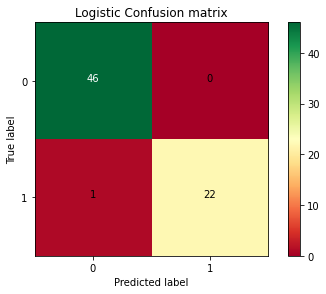

Accuracy  =     0.986
Precision =     1.000
Recall    =     0.957
F1_score  =     0.978


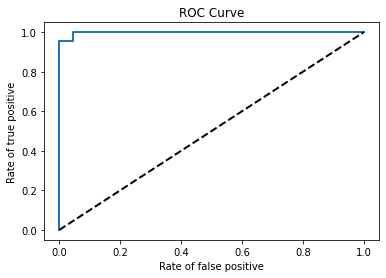

In [36]:
CVLogClf = LogisticRegression(C = best_parameters['C'],
                                penalty = best_parameters['penalty'],
                                random_state = 42)

CVLogClf.fit(X_train, y_train)
y_pred = CVLogClf.predict(X_test)
y_score = CVLogClf.decision_function(X_test)

cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plotConfusionMatrix(cm,
                      classes=class_names,
                      title='Logistic Confusion matrix')
plt.savefig('6')
plt.show()

showMetrics()
fpr, tpr, t = roc_curve(y_test, y_score)
plotRoc()

RFE - 30 => 15

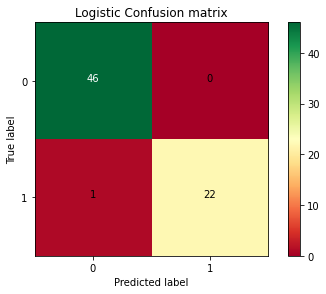

Accuracy  =     0.986
Precision =     1.000
Recall    =     0.957
F1_score  =     0.978


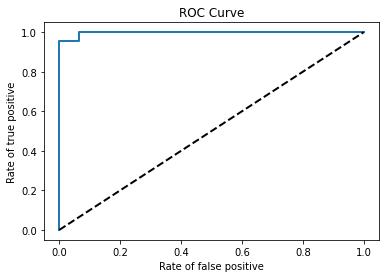

In [37]:
logClf = LogisticRegression(C = best_parameters['C'],
                                 penalty = best_parameters['penalty'],
                                 random_state = 42)

selector = RFE(logClf)
selector = selector.fit(X_train, y_train)

y_pred = selector.predict(X_test)
y_score = selector.predict_proba(X_test)[:,1]


# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plotConfusionMatrix(cm,
                      classes=class_names,
                      title='Logistic Confusion matrix')
plt.show()
showMetrics()
fpr, tpr, t = roc_curve(y_test, y_score)
plotRoc()

In [38]:
print("="*72)
print(selector.support_)# support
print("="*72)
print(selector.ranking_)#ranking RFE
print("="*72)

[ True  True  True  True False False False  True False False  True False
 False  True False False False False False False  True  True  True  True
  True False  True  True  True False]
[ 1  1  1  1  8 16  4  1 12  6  1 15  2  1 13  5 14 10  9  3  1  1  1  1
  1  7  1  1  1 11]


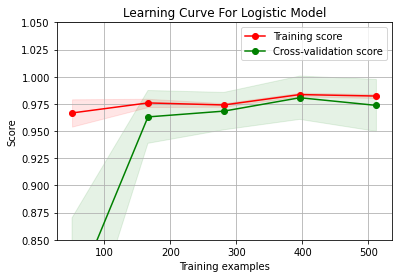

Cross val Log 
[accuracy] : 0.97541 (+/- 0.00653)
[precision] : 0.99024 (+/- 0.01196)
[recall] : 0.94352 (+/- 0.01856)
Processing some more values and calulating, please hold...


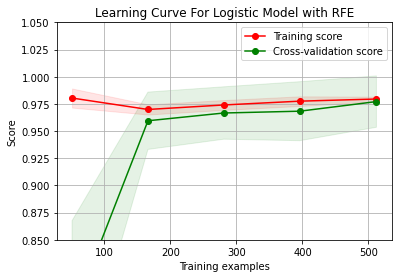

Cross val Log with RFE
[accuracy] : 0.97365 (+/- 0.01107)
[precision] : 0.98524 (+/- 0.01206)
[recall] : 0.94352 (+/- 0.02368)
Process completed with no errors


In [39]:
plotLearningCurve(CVLogClf, 'Learning Curve For Logistic Model', X, y, (0.85,1.05), 10)
plt.savefig('7')
plt.show()
print("="*15)
print("Cross val Log ")
print("="*15)
crossLog = crossValMetrics(CVLogClf)
print("="*36)
print("Processing some more values and calulating, please hold...")
plotLearningCurve(selector, 'Learning Curve For Logistic Model with RFE', X, y, (0.85,1.05), 10)
plt.show()
print("="*15)
print("Cross val Log with RFE")
print("="*15)
cross_selector = crossValMetrics(selector)
print("="*36)
print("Process completed with no errors")
print("="*36)

Selecting threshold for a recall = 100% (detecting all malignant tumors)

Recall w/ threshold = 0.1 : 1.0
Recall w/ threshold = 0.2 : 0.9565217391304348
Recall w/ threshold = 0.3 : 0.9565217391304348
Recall w/ threshold = 0.4 : 0.9565217391304348
Recall w/ threshold = 0.5 : 0.9565217391304348
Recall w/ threshold = 0.6 : 0.9565217391304348
Recall w/ threshold = 0.7 : 0.9565217391304348
Recall w/ threshold = 0.8 : 0.8260869565217391
Recall w/ threshold = 0.9 : 0.782608695652174
Done, displaying heatmaps now...


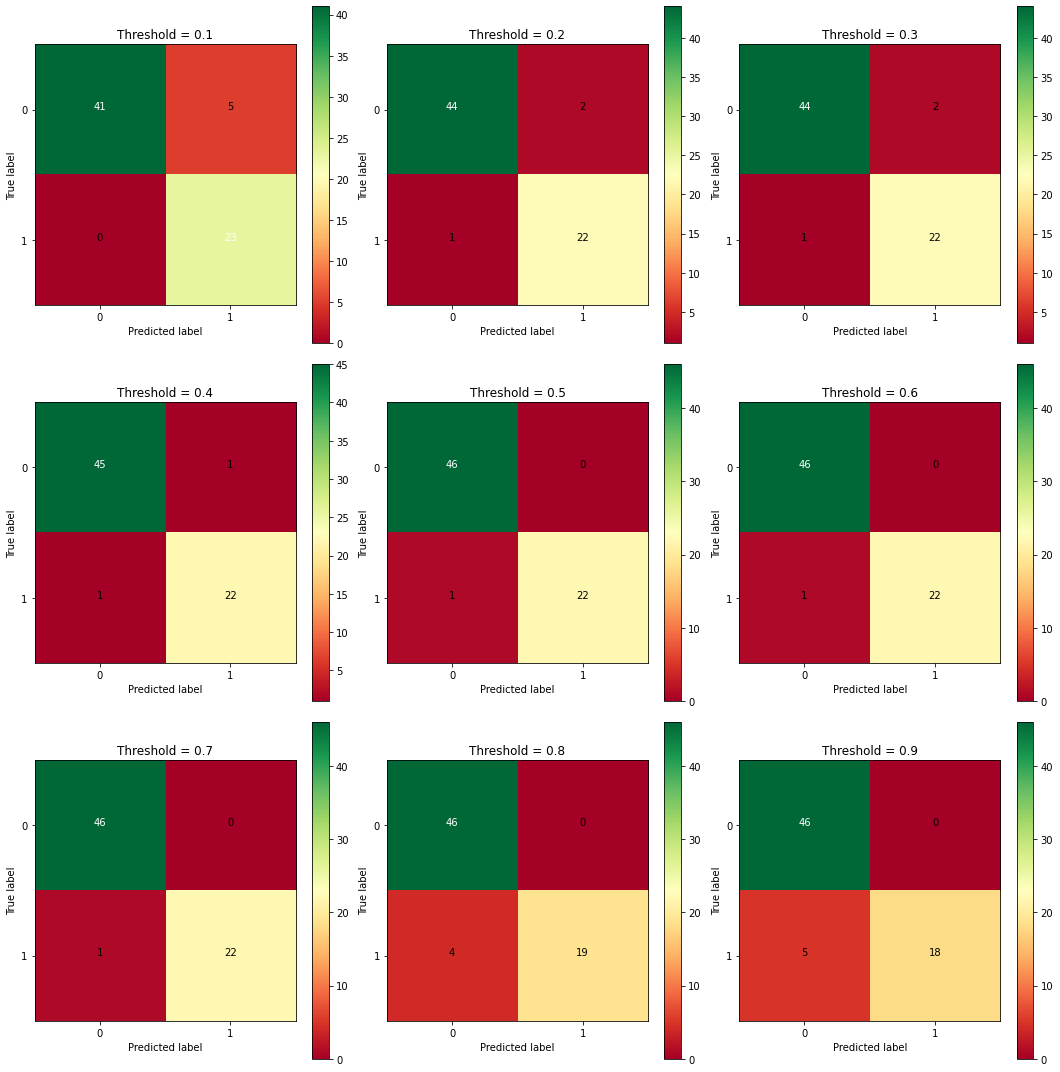

In [40]:
thresholds_adj = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize = (15,15))

j = 1
for i in thresholds_adj:
    y_score = CVLogClf.predict_proba(X_test)[:,1] > i
    
    
    plt.subplot(3,3,j)
    j += 1
    
    cm = confusion_matrix(y_test, y_score)
    
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]

    print('Recall w/ threshold = %s :'%i, (tp/(tp+fn)))
    
    class_names = [0,1]
    plotConfusionMatrix(cm, 
                          classes=class_names, 
                          title='Threshold = %s'%i)
print("Done, displaying heatmaps now...")

Recall = 100%

In [41]:
print("="*21)
y_score = CVLogClf.predict_proba(X_test)[:,1] > 0.1
cm = confusion_matrix(y_test, y_score)
class_names = [0,1]
showMetrics()
print("="*21)

Accuracy  =     0.928
Precision =     0.821
Recall    =     1.000
F1_score  =     0.902


**PREDICTIVE MODEL 2**

"Ensemble Classifier to maximise precision and detect all malignant tumors"

In [42]:
logTwoClf = LogisticRegression(random_state = 42)
paramGrid = {
            'penalty' : ['l2','l1'],
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            }

CVLogTwoClf = GridSearchCV(estimator = logTwoClf, param_grid = paramGrid , scoring = 'recall', verbose = 1, n_jobs = -1)
CVLogTwoClf.fit(X_train, y_train)

bestParameters = CVLogTwoClf.best_params_
print('The best parameters for using this model is', bestParameters)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
The best parameters for using this model is {'C': 1, 'penalty': 'l2'}


In [43]:
CVLogTwoClf = LogisticRegression(C = best_parameters['C'],
                                 penalty = best_parameters['penalty'],
                                 random_state = 42)


CVLogTwoClf.fit(X_train, y_train)

y_pred = CVLogTwoClf.predict(X_test)
y_score = CVLogTwoClf.decision_function(X_test)
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]

In [44]:
logreg = LogisticRegression(max_iter=1000) #have to pass this explicitly as it throws a max iteration error for the cells below

In [45]:
print("="*41)
print("Cross val Log for second predictive model ")
print("="*41)
crossValMetrics(CVLogTwoClf)
print("="*35)

Cross val Log for second predictive model 
[accuracy] : 0.97541 (+/- 0.00653)
[precision] : 0.99024 (+/- 0.01196)
[recall] : 0.94352 (+/- 0.01856)


In [46]:
print("="*21)
votingClf = VotingClassifier (
        estimators = [('logOne', CVLogClf), ('logTwo', CVLogTwoClf)],
                     voting='soft', weights = [1, 1])
    
votingClf.fit(X_train,y_train)

y_pred = votingClf.predict(X_test)
y_score = votingClf.predict_proba(X_test)[:,1]

# Confusion maxtrix
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
showMetrics()
print("="*21)

Accuracy  =     0.986
Precision =     1.000
Recall    =     0.957
F1_score  =     0.978


In [47]:
print("="*51)
print("Cross val Log for voting classifier logOne + LogTwo ")
print("="*51)
crossVoting = crossValMetrics(votingClf)
print("="*35)

Cross val Log for voting classifier logOne + LogTwo 
[accuracy] : 0.97541 (+/- 0.00653)
[precision] : 0.99024 (+/- 0.01196)
[recall] : 0.94352 (+/- 0.01856)


Processing...


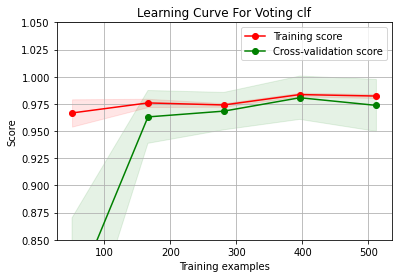

Process completed with no errors


In [48]:
print("Processing...")
plotLearningCurve(votingClf, 'Learning Curve For Voting clf', X, y, (0.85,1.05), 10)
plt.savefig('9')
plt.show()
print("Process completed with no errors")

Voting classifier : Selecting threshold (recall = 100%)

Recall w/ threshold = 0.1 : 1.0
Recall w/ threshold = 0.2 : 0.9565217391304348
Recall w/ threshold = 0.3 : 0.9565217391304348
Recall w/ threshold = 0.4 : 0.9565217391304348
Recall w/ threshold = 0.5 : 0.9565217391304348
Recall w/ threshold = 0.6 : 0.9565217391304348
Recall w/ threshold = 0.7 : 0.9565217391304348
Recall w/ threshold = 0.8 : 0.8260869565217391
Recall w/ threshold = 0.9 : 0.782608695652174
Done, displaying heatmaps now...


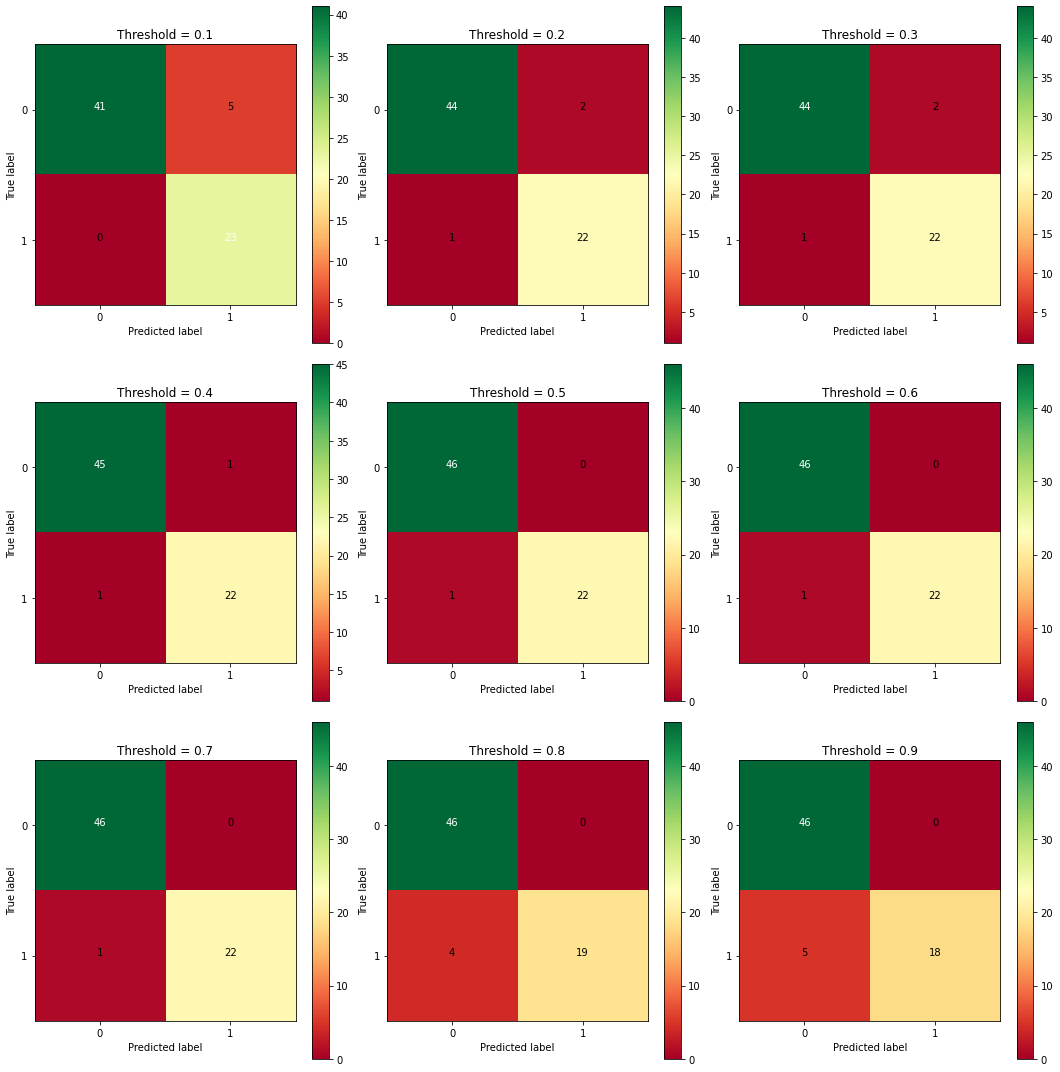

In [49]:
thresholds_adj = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize = (15,15))

j = 1
for i in thresholds_adj:
    y_score = votingClf.predict_proba(X_test)[:,1] > i
    
    
    plt.subplot(3,3,j)
    j += 1
    
    cm = confusion_matrix(y_test, y_score)
    
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]

    print('Recall w/ threshold = %s :'%i, (tp/(tp+fn)))
    
    class_names = [0,1]
    plotConfusionMatrix(cm, 
                          classes=class_names, 
                          title='Threshold = %s'%i)
print("Done, displaying heatmaps now...")

Voting classifier : predicting with recall = 100% (precision = 92%)

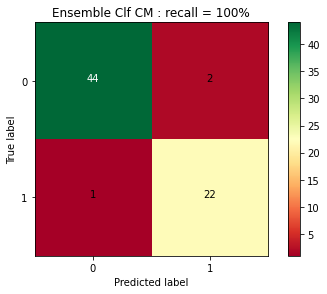

Accuracy  =     0.957
Precision =     0.917
Recall    =     0.957
F1_score  =     0.936


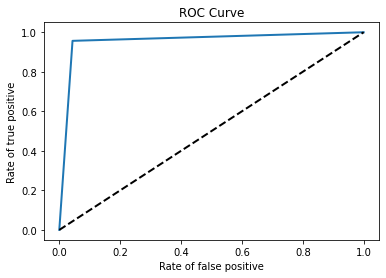

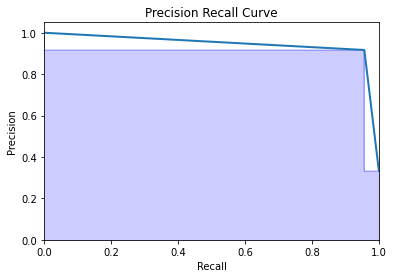

In [50]:
y_score = votingClf.predict_proba(X_test)[:,1] > 0.23
cm = confusion_matrix(y_test, y_score)
class_names = [0,1]
plt.figure()
plotConfusionMatrix(cm, 
                      classes = class_names, 
                      title = 'Ensemble Clf CM : recall = 100%')
plt.savefig('8')
plt.show()
print("="*21)
showMetrics()
print("="*21)
fpr, tpr, t = roc_curve(y_test, y_score)
plotRoc()

precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plotPrecisionRecall()

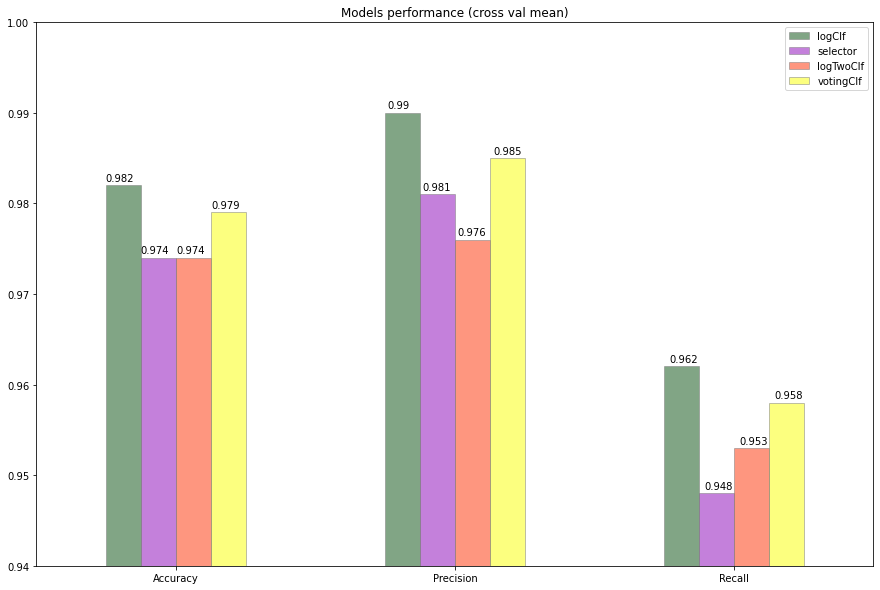

In [51]:
models_metrics = {'logClf': [0.982, 0.990, 0.962], 
                 'selector': [0.974, 0.981, 0.948],
                 'logTwoClf' : [0.974,0.976,0.953],
                 'votingClf' : [0.979,0.985,0.958]
                }
df = pd.DataFrame(data = models_metrics)
df.rename(index={0:'Accuracy',1:'Precision', 2: 'Recall'}, 
                 inplace=True)
ax = df.plot(kind='bar', figsize = (15,10), ylim = (0.94, 1), 
        color = ['#054D0C', '#8A03B9', '#FE2E01', '#FBFF00'],
        rot = 0, title ='Models performance (cross val mean)',
        edgecolor = 'grey', alpha = 0.5)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.0005))
plt.show()